In [5]:
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus  # pip install pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [6]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out

# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]   

# Training Data

In [7]:

df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,True,False,False,True,False,True,False,False,True
1,1,True,False,False,True,False,False,True,True,False
2,0,True,False,True,False,True,False,False,False,True
3,1,False,True,True,False,True,False,False,True,False
4,1,False,True,False,True,False,False,True,False,True
5,0,False,True,False,True,False,True,False,False,True
6,0,True,False,False,True,True,False,False,False,True


In [8]:
df_train.shape

(7, 10)

In [9]:
df_train['Will_go']

0    0
1    1
2    0
3    1
4    1
5    0
6    0
Name: Will_go, dtype: int64

1. What is the entropy 
 of the initial system? By system states, we mean values of the binary feature “Will_go” - 0 or 1 - two states in total.

Pour moi l'entropy est max à S0 on ne peut pas connaitre le résultat c'est quasiment aléatoire
entropy S0 = 0.985

2. Let’s split the data by the feature “Looks_handsome”. What is the entropy 
 of the left group - the one with “Looks_handsome”. What is the entropy 
 in the opposite group? What is the information gain (IG) if we consider such a split?
On a une entropy S1 = 0.918
et donc un gain d'information IG de 0.128

Train a decision tree using sklearn on the training data. You may choose any depth for the tree.

In [12]:
from sklearn import tree

X = df_train.drop(columns=['Will_go'])
Y = df_train['Will_go']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


[Text(0.6, 0.8333333333333334, 'x[6] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.4, 0.5, 'x[8] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.6666666666666667, '  False')]

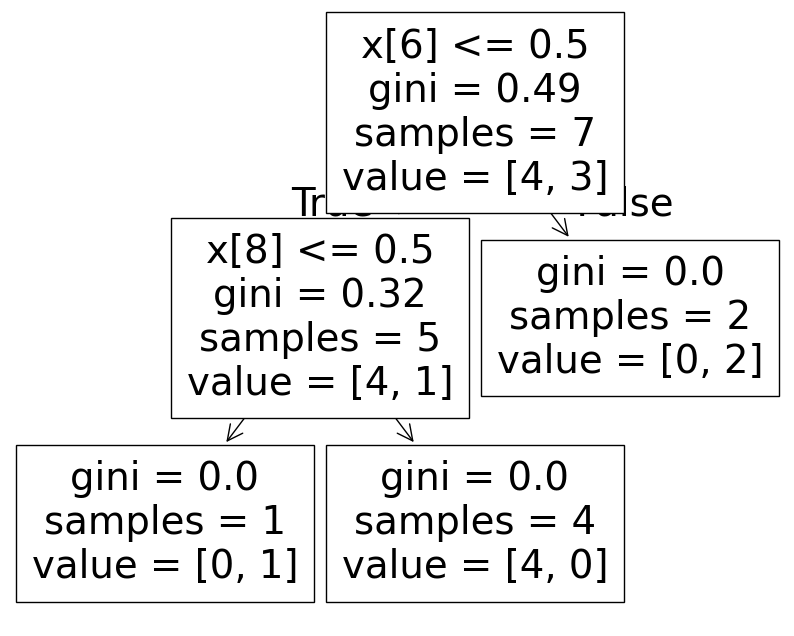

In [13]:
tree.plot_tree(clf)

# Part 2. Functions for calculating entropy and information gain.

In [ ]:
# Implement a function to calculate the Shannon Entropy

import math

balls = [1 for i in range(9)] + [0 for i in range(11)]
# two groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow

In [43]:
EntropyS0 = -((len(uns) / total) * math.log2(len(uns) / total)) - ((len(zeros) / total) * math.log2(len(zeros) / total))

In [44]:
EntropyS0

0.9612366047228759

In [47]:
def entropy(uns, zeros, total):
    Entropy = -((len(uns) / total) * math.log2(len(uns) / total)) - ((len(zeros) / total) * math.log2(len(zeros) / total))
    return Entropy

In [49]:
uns = [x for x in balls_right if x == 1]
zeros = [x for x in balls_right if x == 0]
total = len(balls_right)

In [50]:
entropy(uns, zeros, total)

0.5916727785823275